## LA census population

## Backgroud

Every March and April of the year, US goverment ask residents completed census. What is inside of the census could we know? Are there any linear relation between each factor? The goal of this assignment is to draw a scatter plot with a least square regression line of variables perimeter and area, and calculate the correlation coefficient and the coefficient of determination.

## Data

The dataset hosted by the city of Los Angeles in 2010. The data collected by zip code, which showed the different regions people census. In this assignment, we took population and househole as variable to see if there is any relation between its.  

data: https://www.kaggle.com/cityofLA/los-angeles-census-data

variables: x - Total Population (number)
           y - Total Households (number)
           
We are courios about if total household change by the total population? So we took total population as a indepentdent variable (X), and total household as a dependent varoable (Y). 

### Load The data

In [20]:
import pandas as pd
pop = pd. read_csv("2010census-populations.csv", encoding = "unicode_escape")

### Explore the data

First, checked the data type. Because we are going to calculate the data, the type should be int or float. Also, checked if there is any null column in the dataset. As below showed, all the numbers in each columns are numberic and there is no null row.

In [21]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
Zip Code                  319 non-null int64
Total Population          319 non-null int64
Median Age                319 non-null float64
Total Males               319 non-null int64
Total Females             319 non-null int64
Total Households          319 non-null int64
Average Household Size    319 non-null float64
dtypes: float64(2), int64(5)
memory usage: 17.5 KB


In [22]:
pop.isnull().sum()

Zip Code                  0
Total Population          0
Median Age                0
Total Males               0
Total Females             0
Total Households          0
Average Household Size    0
dtype: int64

### Clean the data

Because zip code is a code which not present any meaningful numbers, we dropped the column and rename other columns.

In [23]:
pop = pop.drop(["Zip Code"],axis = 1)

In [24]:
pop.columns = ["Total_Population","Median_Age","Total_Males","Total_Females","Total_Households","Average_Household_Size"]

In [25]:
pop.head()

,Total_Population,Median_Age,Total_Males,Total_Females,Total_Households,Average_Household_Size
0,1,73.5,0,1,1,1.00
1,57110,26.6,28468,28642,12971,4.40
2,51223,25.5,24876,26347,11731,4.36
3,66266,26.3,32631,33635,15642,4.22
4,62180,34.8,31302,30878,22547,2.73


## Analysis

### import library

Before analyze, we called useful library. Using numpy transpose fuction can transfer each cloumn to each list, then we assigned column name by index.

In [26]:
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

In [27]:
pop = np.transpose(np.array(pop))
Total_Population = pop[0]
Median_Age = pop[1]
Total_Males = pop[2]
Total_Females = pop[3]
Total_Households = pop[4]
Average_Household_Size = pop[5]

### function

Functions contained the calculation in slope and intercept of the least square regression line, the drowing of the scatter plot and regression line, the calculation of correlation coefficient and coefficient of determination.

In [28]:
def show_scatter_plot(title, x_label, y_label, x_values, y_values):
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

In [29]:
def calculate_slope_intercept(x_values, y_values):
    x = x_values
    y = y_values
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator   = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [30]:
def show_least_squares_line(title, x_label, y_label, x_values, y_values):

    plt.scatter(x_values, y_values)
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(x_values, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

In [31]:
def coefficient_of_determination(x_values, y_values):
    x = x_values
    y = y_values
    n = len(x)
    m, b = calculate_slope_intercept(x_values, y_values)
    ss_r = np.sum(y*y) - b*(np.sum(y)) - m*(np.sum(x*y))
    ss_t = np.sum(y*y) - ((np.sum(y))**2)/n
    r_2 = 1 - ss_r/ss_t
    return r_2

In [32]:
def correlation_coifficient(x_values,y_values):
    x = x_values
    y = y_values
    n = len(x)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_error = x - x_mean
    y_error = y - y_mean
    
    r = (np.sum(x_error*y_error))/(np.sqrt(np.sum(x_error*x_error))*np.sqrt(np.sum(y_error*y_error)))
    return r

### Generate scatter plot and regression line

call scatter plot function to show a scatter plot of total population and total households.

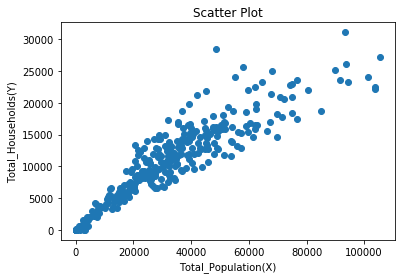

In [33]:
show_scatter_plot('Scatter Plot', 'Total_Population(X)', 'Total_Households(Y)', Total_Population, Total_Households )

Draw the least-square regression line through the scatter plot, and it also showed m, b values.

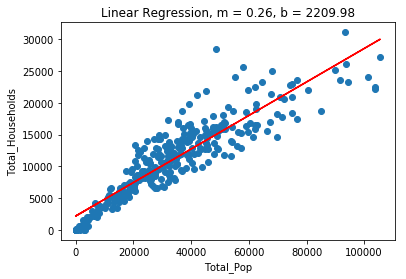

In [34]:
show_least_squares_line('Linear Regression','Total_Pop','Total_Households',Total_Population,Total_Households)

### Calculate the correlation coefficient and coefficient of determination

In [35]:
r_2 = coefficient_of_determination(Total_Population,Total_Households)
r = correlation_coifficient(Total_Population,Total_Households)

In [36]:
print(r_2)
print(r)

0.8263841837453121
0.9090567549637986


## Result

According to the correlation coefficient, the correlation coifficinet is 0.91, we can conclude that there's a significantly strong relation between total population(X) and total households(Y) in LA. However, we can't not conclue that total household is caused by the total population. Strong correlation does not imply causation becuase it is possilbe that total poluation and total households are each strongly related to another vairable.